In [2]:
import pandas as pd

In [3]:
df_6 = pd.read_csv("diabetes.csv")

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [5]:
from sklearn.externals.six import StringIO

C:\Users\user\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [6]:
X = df_6.drop('Outcome', axis=1)
y = df_6['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[116  33]
 [ 36  46]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       149
           1       0.58      0.56      0.57        82

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231



In [11]:
dot_data = StringIO()

In [12]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['Pregnancie', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age '],
        class_names=['0',"1"],
        filled=True, rounded=True,
        impurity=False)

In [13]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

畫出決策樹

In [14]:
graph[0].write_pdf("MASS01.pdf")

[Text(139.7897922636103, 209.6742857142857, 'X[1] <= 123.5\ngini = 0.453\nsamples = 537\nvalue = [351, 186]'),
 Text(48.08553008595989, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.299\nsamples = 322\nvalue = [263, 59]'),
 Text(26.860744985673353, 178.61142857142858, 'X[5] <= 49.1\ngini = 0.147\nsamples = 175\nvalue = [161, 14]'),
 Text(19.186246418338108, 163.07999999999998, 'X[0] <= 7.5\ngini = 0.13\nsamples = 172\nvalue = [160, 12]'),
 Text(15.348997134670487, 147.54857142857142, 'X[5] <= 30.95\ngini = 0.12\nsamples = 171\nvalue = [160, 11]'),
 Text(7.6744985673352435, 132.01714285714286, 'X[6] <= 0.657\ngini = 0.021\nsamples = 93\nvalue = [92, 1]'),
 Text(3.8372492836676217, 116.48571428571428, 'gini = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(11.511747851002866, 116.48571428571428, 'X[6] <= 0.686\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(7.6744985673352435, 100.9542857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(15.348997134670487, 100.9542857142857, 'gin

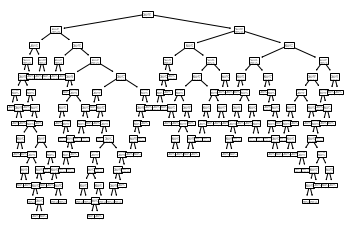

In [15]:
tree.plot_tree(classifier)

修剪

In [16]:
import matplotlib.pyplot as plt

In [17]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

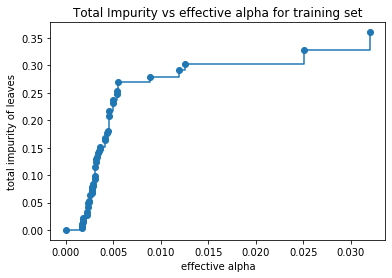

In [17]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [18]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.09879738007523431


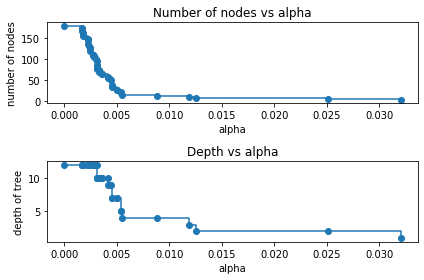

In [19]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

得出避免過度訓練的alpha值
1. alpha 為0.008

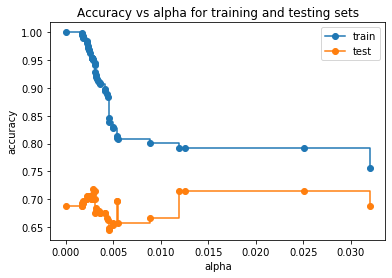

In [20]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

修剪後Decision tree(第二次)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import pydot

In [22]:
df_9 = pd.read_csv("diabetes.csv")
df_10=df_9
df_10

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [24]:
X = df_10.drop('Outcome', axis=1)
y = df_10['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [25]:
classifier = DecisionTreeClassifier(ccp_alpha=0.008)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.008, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
y_pred = classifier.predict(X_test)

分類結果

In [1]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'confusion_matrix' is not defined

In [28]:
dot_data = StringIO()

In [29]:
tree.export_graphviz(classifier,
        out_file=dot_data,
        feature_names=['Pregnancie', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age '],
        class_names=['0',"1"],
        filled=True, rounded=True,
        impurity=False)

In [30]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [31]:
graph[0].write_pdf("MASS最終.pdf")

[Text(167.40000000000003, 199.32, 'X[1] <= 129.5\ngini = 0.45\nsamples = 537\nvalue = [353, 184]'),
 Text(66.96000000000001, 163.07999999999998, 'X[7] <= 28.5\ngini = 0.315\nsamples = 353\nvalue = [284, 69]'),
 Text(33.480000000000004, 126.83999999999999, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]'),
 Text(100.44000000000001, 126.83999999999999, 'X[5] <= 26.35\ngini = 0.458\nsamples = 155\nvalue = [100, 55]'),
 Text(66.96000000000001, 90.6, 'gini = 0.069\nsamples = 28\nvalue = [27, 1]'),
 Text(133.92000000000002, 90.6, 'X[6] <= 1.039\ngini = 0.489\nsamples = 127\nvalue = [73, 54]'),
 Text(100.44000000000001, 54.359999999999985, 'X[4] <= 142.5\ngini = 0.472\nsamples = 118\nvalue = [73, 45]'),
 Text(66.96000000000001, 18.119999999999976, 'gini = 0.43\nsamples = 99\nvalue = [68, 31]'),
 Text(133.92000000000002, 18.119999999999976, 'gini = 0.388\nsamples = 19\nvalue = [5, 14]'),
 Text(167.40000000000003, 54.359999999999985, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(267.8400000

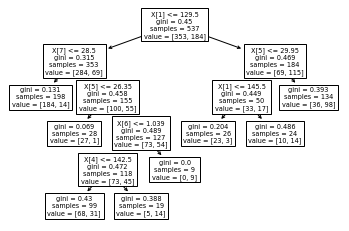

In [32]:
tree.plot_tree(classifier)